In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.executable

'c:\\Data\\Projects\\phd\\dino\\env\\Scripts\\python.exe'

In [3]:
from dino.environments.playground import PlaygroundEnvironment

In [4]:
env = PlaygroundEnvironment()
print(env)
print(env.world.cascadingChildren())
print(env.world.cascadingProperties())

2020-09-15 17:51:04 RedSky m:PlaygroundEnvironment:c[10612] INFO Module 'PlaygroundEnvironment' has been started
SpaceManager(5 spaces and 4 entities)
[Agent:0#Agent bound to root:0, Cylinder:0#Cylinder1 bound to root:0, Cylinder:1#Cylinder2 bound to root:0]
[👁'#Agent.position', 👁'#Agent.lidar', 🕹'#Agent.move', 👁'#Cylinder1.position', 👁'#Cylinder2.position']


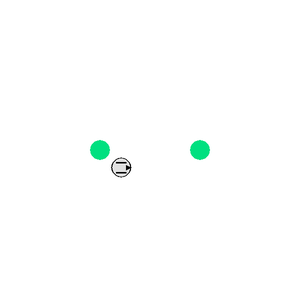

In [18]:
env.image()

In [6]:
env.scheduledActions()

{Agent RandomAgent: <function dino.agents.agent.Agent.schedule.<locals>.func()>}

In [4]:
from dino.agents.agent import Agent
from dino.agents.random import RandomAgent
agent = RandomAgent(env.world.findHost())

2020-09-15 15:08:29 RedSky m:PlaygroundEnvironment:c[32] INFO Module 'Agent' has been started
2020-09-15 15:08:29 RedSky m:PlaygroundEnvironment:c[32] INFO Module 'Performer' has been started
2020-09-15 15:08:29 RedSky m:PlaygroundEnvironment:c[32] INFO Module 'Strategy randomStrategy' has been started


In [15]:
from dino.agents.agent import Agent
from dino.agents.learners.model.random import RandomLearner
learner = RandomLearner(env.world.findHost())

2020-09-15 18:00:09 RedSky m:PlaygroundEnvironment:c[10612] INFO Module 'ModelDataset' has been started
2020-09-15 18:00:09 RedSky m:PlaygroundEnvironment:c[10612] INFO Module 'ModelDataset' has been started
2020-09-15 18:00:09 RedSky m:PlaygroundEnvironment:c[10612] INFO Module 'Agent' has been started
2020-09-15 18:00:09 RedSky m:PlaygroundEnvironment:c[10612] INFO Module 'Performer' has been started
2020-09-15 18:00:09 RedSky m:PlaygroundEnvironment:c[10612] INFO Module 'Strategy randomStrategy' has been started


In [7]:
agent.actions()

[🕹'Agent:0#Agent.move']

In [5]:
agent.test()

In [54]:
learner.train(1000)

In [55]:
env.run()

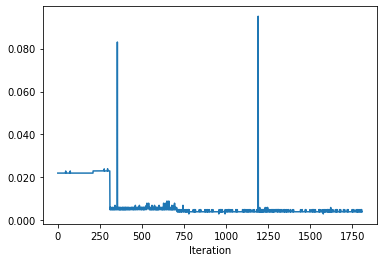

In [56]:
from exlab.interface.graph import Visual
v = Visual()
v.display(env.visualizeTimeByIteration())

In [11]:
env.visualizeTimeByIteration().items[0].data

([],)

In [38]:
env.timeByIteration[-1]*100

2.201986312866211

In [11]:
learner.dataset.spaces

[@☰#5↝🕹'#Agent.move'↕2,
 @☰#12↝👁'#Agent.position'↕2,
 @☰#13↝👁'#Agent.lidar'↕8,
 @☰#14↝👁'#Cylinder1.position'↕2,
 @☰#15↝👁'#Cylinder2.position'↕2,
 @☰∥#16⇉👁[↝👁'#Agent.position' ↝👁'#Cylinder1.position' ↝👁'#Cylinder2.position' ↝👁'#Agent.lidar']↕14,
 @☰#17↝👁'#Agent.position':PRE↕2,
 @☰#18↝👁'#Agent.lidar':PRE↕8,
 @☰#19↝👁'#Cylinder1.position':PRE↕2,
 @☰#20↝👁'#Cylinder2.position':PRE↕2,
 @☰∥#21⇉👁[↝👁'#Agent.lidar' ↝👁'#Cylinder1.position' ↝👁'#Agent.position' ↝👁'#Cylinder2.position']↕14]

In [26]:
learner.dataset.space(12).data

array([[-17.97570257,  11.02197518],
       [  2.92439576, -13.98706326],
       [  0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ]])

In [ ]:
agent.train(iterations=10)
env.run()

In [8]:
agent.perform(agent.actions().sample().point([1., 1.]))

In [8]:
from dino.data.spacemanager import SpaceManager
ds = SpaceManager(storesData=True)
ds

SpaceManager(0 spaces and 1 entities)

In [9]:
obs = env.world.observe().convertTo(ds)
for o in obs:
    o.space.addPoint(o, 0)

In [12]:
ds.spaces

[@⛁#7↝👁'Agent:1#Agent.position'(↕2),
 @⛁#8↝👁'Agent:1#Agent.lidar'(↕8),
 @⛁#9↝👁'Cylinder:2#Cylinder1.position'(↕2),
 @⛁#10↝👁'Cylinder:3#Cylinder2.position'(↕2),
 @⛁⏸#11⇉👁[↝👁'Agent:1#Agent.position'+↝👁'Cylinder:2#Cylinder1.position'+↝👁'Cylinder:3#Cylinder2.position'+↝👁'Agent:1#Agent.lidar'](↕14)]

In [21]:
from dino.data.dataspace import DataSpace
A = DataSpace(ds, 2)
B = DataSpace(ds, 2)
C = DataSpace(ds, 2)
A.addPoint(A.point([1, 2]), 0)
B.addPoint(B.point([3, 4]), 0)
C.addPoint(C.point([5, 6]), 0)

0

In [26]:
Z = ds.multiColSpace([A, B])
Y = ds.multiColSpace([Z, C])

In [31]:
Z.data

array([[1., 2., 3., 4.]])

In [15]:
env.world.cascadingProperty('.position')

👁'Cylinder:2#Cylinder1.position'

In [13]:
from dino.data.abstract import *
amt = AMT()
test = amt.abstractProperty(env.world.cascadingProperty('#Cylinder1.position'), appendToChildren=True)

hello
hello


In [14]:
test.entity.assignable(env.world.cascadingChild('#Cylinder2'))

hello


In [15]:
test.element.assignables

{'position'}

In [16]:
test.assignableElements()

{Entity (A): {Cylinder:2#Cylinder1 bound to root:1,
  Cylinder:3#Cylinder2 bound to root:1}}

In [18]:
test.get(ds).number

2

In [19]:
ds.spaces

[@⛁#7↝👁'Agent:1#Agent.position'(↕2),
 @⛁#8↝👁'Agent:1#Agent.lidar'(↕8),
 @⛁#9↝👁'Cylinder:2#Cylinder1.position'(↕2),
 @⛁#10↝👁'Cylinder:3#Cylinder2.position'(↕2),
 @⛁⏸#11⇉👁[↝👁'Agent:1#Agent.position'+↝👁'Cylinder:2#Cylinder1.position'+↝👁'Cylinder:3#Cylinder2.position'+↝👁'Agent:1#Agent.lidar'](↕14),
 @⛁(↝👁'Cylinder:3#Cylinder2.position'>↝👁'Cylinder:2#Cylinder1.position')(2)]

In [21]:
B.data

array([[3., 4.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [7]:
cyl = env.world.cascadingChild('Cylinder')
prop = env.world.cascadingProperty('Cylinder.position')
obs = prop.observe()

In [10]:
obs.space

@#0→👁'Cylinder:0.position':BASIC(↕2)

In [9]:
obs.convertTo(ds)

AttributeError: 'SpaceManager' object has no attribute 'multiColSpace'

In [13]:
cyl.convertTo(ds)

Cylinder:1 bound to root:2

In [7]:
cyl = env.world.cascadingChild('Cylinder')

In [26]:
cyl.convertTo(ds)

Cylinder:1 bound to root:2

In [25]:
ds.world.cascadingChildren()[0].native

Cylinder:0 bound to root:0

In [37]:
[e for e in ds.world.cascadingChildren() if e.linkedTo(cyl)]

[]

In [39]:
env.world.cascadingProperties()

[👁'Cylinder:0.position']

In [23]:
env.world.cascadingProperty('.position').observe()

Observation[#3→👁'Cylinder:3.position'(↕2)@±200.000, 400.000]

In [7]:
env.show()

In [8]:
env.hide()